In [2]:
import pandas as pd
import numpy as np

In [89]:
users = pd.read_csv('./users.csv')
users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [90]:
# Check for duplicates in id

users[users.duplicated(['id'])]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination


In [91]:
# Find the number of rows and columns

users.shape

(213451, 16)

In [92]:
# Find the data type of each feature

users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [93]:
# Find the percentage of null entries for features with null

users.isnull().sum()[users.isnull().sum() != 0]/users.shape[0]*100

date_first_booking         58.347349
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

In [94]:
# Model 1: Investigate user characteristics that distinguish booking vs non-booking

In [95]:
# Separate timestamp_first_active into year, month and hour

users['year_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[:4])
users['month_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[4:6])
users['hour_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[8:10]).astype(int)

In [96]:
# Find start and end date of date_first_active

users['date_first_active'] = users['timestamp_first_active'].apply(lambda x: str(x)[:8])
users['date_first_active'] = pd.to_datetime(users['date_first_active'])

In [97]:
users['date_first_active'].min()

Timestamp('2009-03-19 00:00:00')

In [98]:
users['date_first_active'].max()

Timestamp('2014-06-30 00:00:00')

In [99]:
users['year_first_active'].value_counts()/users.shape[0]*100

2013    38.861378
2014    35.806813
2012    18.493706
2011     5.525390
2010     1.310371
2009     0.002342
Name: year_first_active, dtype: float64

In [100]:
users[users['year_first_active'] == '2009']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,year_first_active,month_first_active,hour_first_active,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009,03,4,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009,05,17,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009,06,23,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009,10,6,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009,12,6,2009-12-08


In [101]:
# Remove rows where year_first_active is 2009

users.drop([0,1,2,3,4], axis = 0, inplace = True)

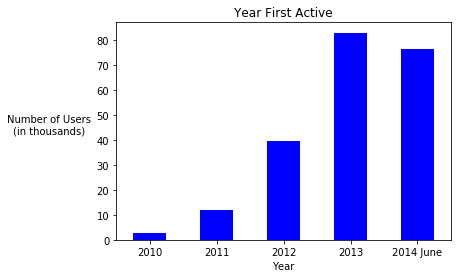

In [102]:
ax = users['year_first_active'].value_counts().sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_xticklabels(['2010','2011','2012','2013','2014 June'])
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_title('Year First Active', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [103]:
users['year_first_active'].value_counts()/users.shape[0]*100

2013    38.862288
2014    35.807652
2012    18.494139
2011     5.525519
2010     1.310402
Name: year_first_active, dtype: float64

In [104]:
users['month_first_active'].value_counts()/users.shape[0]*100

06    12.849152
05    12.136559
04    10.248962
03     9.522315
01     8.194578
02     7.767773
09     7.209786
08     6.845760
07     6.482202
10     6.314009
12     6.277466
11     6.151439
Name: month_first_active, dtype: float64

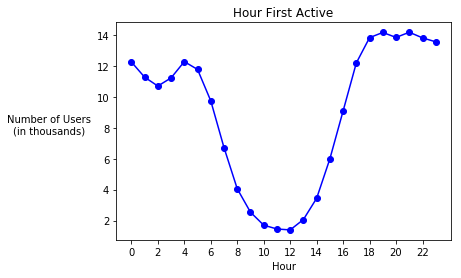

In [105]:
ax = users['hour_first_active'].value_counts().sort_index().plot(color = 'blue', marker = 'o', rot = 0)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 2))
ax.set_yticklabels(['0','2','4','6','8','10','12','14'])
ax.set_title('Hour First Active', y = 1) 
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [106]:
users['hour_first_active'].value_counts()/users.shape[0]*100

21    6.648989
19    6.642429
20    6.491572
18    6.485481
22    6.478454
23    6.358048
4     5.757897
0     5.747590
17    5.719011
5     5.520366
1     5.285646
3     5.264095
2     5.016726
6     4.566963
16    4.261968
7     3.148806
15    2.808204
8     1.900246
14    1.612117
9     1.189528
13    0.966989
10    0.796454
11    0.680266
12    0.652156
Name: hour_first_active, dtype: float64

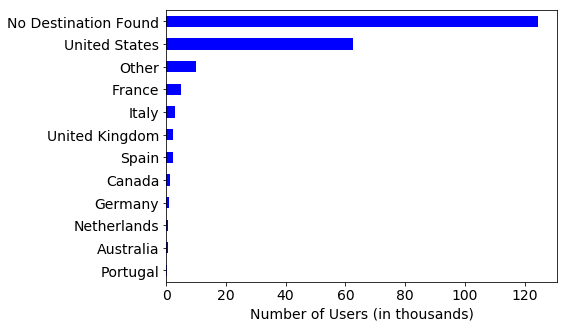

In [107]:
ax = users['country_destination'].value_counts().sort_values(ascending = True).plot(kind = 'barh', 
                                                                                    rot = 0, color = 'b', figsize = (7,5))
ax.set_xticklabels(['0','20','40','60','80','100','120'], fontsize = 14)
ax.set_yticklabels(['Portugal','Australia','Netherlands','Germany','Canada','Spain','United Kingdom',
                   'Italy','France','Other','United States','No Destination Found'], fontsize = 14)
#ax.set_title('Country Destination', y = 1) 
ax.set_xlabel('Number of Users (in thousands)', fontsize = 14)
#ax.set_ylabel('Destination', fontsize = 16).set_rotation(0)
ax.yaxis.set_label_coords(-0.5,0.48)

In [108]:
# Check country_destination

users['country_destination'].value_counts()/users.shape[0]*100

NDF      58.347779
US       29.222379
other     4.728596
FR        2.353288
IT        1.328205
GB        1.088800
ES        1.053662
CA        0.669022
DE        0.497081
NL        0.356999
AU        0.252523
PT        0.101665
Name: country_destination, dtype: float64

In [109]:
# Create target column

users['booking'] = users['country_destination'].apply(lambda x:0 if x == 'NDF' else 1)

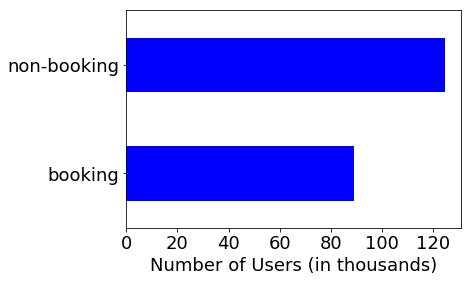

In [110]:
ax = users['booking'].value_counts().sort_values(ascending = True).plot(kind = 'barh', rot = 0, color = 'b')
ax.set_xticklabels(['0','20','40','60','80','100','120'], fontsize = 18)
ax.set_yticklabels(['booking','non-booking'], fontsize = 18)
#ax.set_title('Bookings', y = 1) 
ax.set_xlabel('Number of Users (in thousands)', fontsize = 18).set_rotation(0)

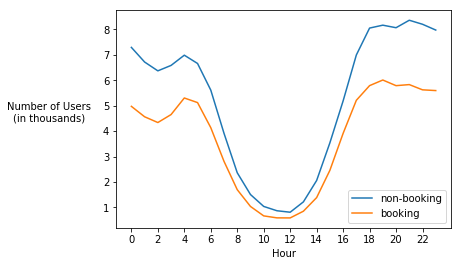

In [111]:
ax = users.groupby(['booking','hour_first_active'])['hour_first_active'].count().unstack(0).plot()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 2))
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8'])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)
ax.legend(loc = 'lower right', labels = ['non-booking','booking'])

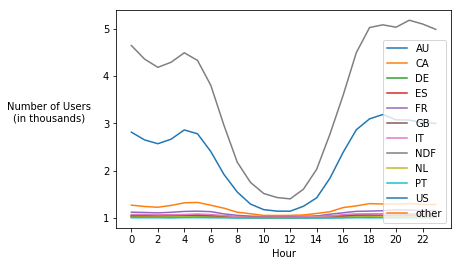

In [112]:
ax = users.groupby(['country_destination','hour_first_active'])['hour_first_active'].count().unstack(0).plot()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 2))
ax.set_yticklabels(['0','1','2','3','4','5','6','7','8'])
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)
ax.legend(loc = 'lower right')

In [113]:
users['booking'].value_counts()/users.shape[0]*100

0    58.347779
1    41.652221
Name: booking, dtype: float64

In [114]:
# Baseline

users['booking'].value_counts()/users.shape[0]

0    0.583478
1    0.416522
Name: booking, dtype: float64

In [115]:
# Find start and end date of date_account_created

users['date_account_created'] = pd.to_datetime(users['date_account_created'])

In [116]:
users['date_account_created'].min()

Timestamp('2010-01-01 00:00:00')

In [117]:
users['date_account_created'].max()

Timestamp('2014-06-30 00:00:00')

In [118]:
# Separate date_account_created into year and month

users['year_account_created'] = users['date_account_created'].apply(lambda x: str(x.year))
users['month_account_created'] = users['date_account_created'].apply(lambda x: str(x.month))

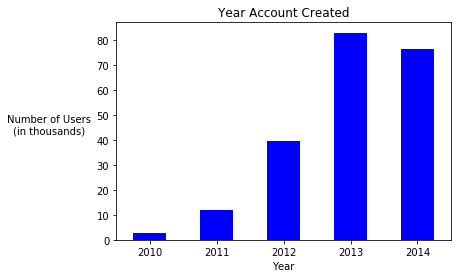

In [119]:
ax = users['year_account_created'].value_counts().sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'])
ax.set_title('Year Account Created', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [120]:
users['year_account_created'].value_counts()/users.shape[0]*100

2013    38.866973
2014    35.824518
2012    18.488048
2011     5.515681
2010     1.304780
Name: year_account_created, dtype: float64

In [121]:
users['month_account_created'].value_counts()/users.shape[0]*100

6     12.846809
5     12.139370
4     10.244746
3      9.522315
1      8.196452
2      7.768710
9      7.211660
8      6.845291
7      6.480328
10     6.313541
12     6.279808
11     6.150970
Name: month_account_created, dtype: float64

In [122]:
# Find start and end date of date_first_booking

users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])

In [123]:
users['date_first_booking'].min()

Timestamp('2010-01-02 00:00:00')

In [124]:
users['date_first_booking'].max()

Timestamp('2015-06-29 00:00:00')

In [125]:
# Separate date_first_booking into year and month

users['year_first_booking'] = users['date_first_booking'].apply(lambda x: str(x.year))
users['month_first_booking'] = users['date_first_booking'].apply(lambda x: str(x.month))

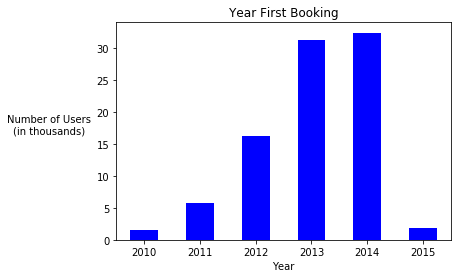

In [126]:
ax = users['year_first_booking'].value_counts()[1:].sort_index().plot(kind = 'bar', color = 'blue', rot = 0)
ax.set_yticklabels(['0','5','10','15','20','25','30'])
ax.set_title('Year First Booking', y = 1) 
ax.set_xlabel('Year')
ax.set_ylabel('Number of Users\n(in thousands)').set_rotation(0)
ax.yaxis.set_label_coords(-0.2,0.48)

In [127]:
users['year_first_booking'].value_counts()/users.shape[0]*100

nan     58.347779
2014    15.188385
2013    14.644922
2012     7.608482
2011     2.688268
2015     0.830187
2010     0.691978
Name: year_first_booking, dtype: float64

In [128]:
users['month_first_booking'].value_counts()/users.shape[0]*100

nan    58.347779
6       4.923494
5       4.908970
4       4.128913
3       3.931205
7       3.396175
8       3.304817
2       3.180664
9       3.090711
1       3.041050
10      2.897220
11      2.466198
12      2.382804
Name: month_first_booking, dtype: float64

In [129]:
# Calculate number of days from first active to account created

users['days_active_to_created'] = users['date_account_created'] - users['date_first_active']
users['days_active_to_created'] = users['days_active_to_created'].apply(lambda x: int(x.days))

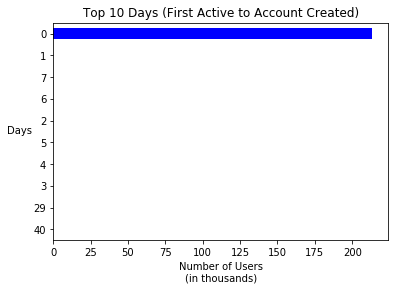

In [130]:
ax = users['days_active_to_created'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','25','50','75','100','125','150','175','200'])
ax.set_title('Top 10 Days (First Active to Account Created)', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')
ax.set_ylabel('Days').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [131]:
# Do not need to consider days_active_to_created as 99.9% are 0 days

users['days_active_to_created'].value_counts()/users.shape[0]*100

0       99.918949
1        0.003280
2        0.001874
6        0.001874
7        0.001874
29       0.001406
3        0.001406
4        0.001406
5        0.001406
40       0.000937
37       0.000937
163      0.000937
9        0.000937
20       0.000937
95       0.000937
312      0.000937
176      0.000937
103      0.000937
104      0.000937
722      0.000937
57       0.000937
634      0.000937
137      0.000469
46       0.000469
283      0.000469
514      0.000469
31       0.000469
35       0.000469
258      0.000469
167      0.000469
          ...    
62       0.000469
447      0.000469
448      0.000469
65       0.000469
322      0.000469
451      0.000469
710      0.000469
838      0.000469
328      0.000469
74       0.000469
331      0.000469
587      0.000469
76       0.000469
204      0.000469
78       0.000469
718      0.000469
80       0.000469
337      0.000469
1361     0.000469
210      0.000469
595      0.000469
851      0.000469
86       0.000469
216      0.000469
1369     0

In [132]:
# Calculate number of days from account created to first booking

users['days_created_to_booking'] = users['date_first_booking'] - users['date_account_created']

days_created_to_booking = []
for i in users['days_created_to_booking']:
    try:
        days_created_to_booking.append(int(i.days))
    except:
        days_created_to_booking.append(np.nan)

users['days_created_to_booking'] = days_created_to_booking

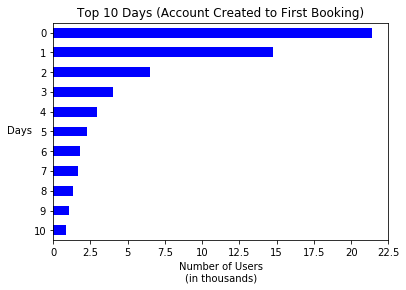

In [133]:
ax = users['days_created_to_booking'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','2.5','5','7.5','10','12.5','15','17.5','20','22.5'])
ax.set_yticklabels(['10','9','8','7','6','5','4','3','2','1','0'])
ax.set_title('Top 10 Days (Account Created to First Booking)', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')
ax.set_ylabel('Days').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [134]:
users['days_created_to_booking'] = users['days_created_to_booking'].fillna(0)
users['days_created_to_booking'].value_counts()/users.shape[0]*100

 0.0      68.375608
 1.0       6.922594
 2.0       3.056979
 3.0       1.882912
 4.0       1.375992
 5.0       1.059284
 6.0       0.837214
 7.0       0.776309
 8.0       0.617018
 9.0       0.490054
 10.0      0.413688
 11.0      0.363558
 12.0      0.317645
 13.0      0.314365
 14.0      0.308275
 15.0      0.261893
 16.0      0.245495
 17.0      0.208015
 21.0      0.185996
 18.0      0.184122
 19.0      0.178031
 20.0      0.176625
 24.0      0.141488
 22.0      0.139145
 28.0      0.138208
 23.0      0.137271
 29.0      0.133992
 25.0      0.126027
 27.0      0.122748
 26.0      0.113846
            ...    
 180.0     0.017803
 283.0     0.017803
 227.0     0.017335
 264.0     0.016398
 300.0     0.016398
 341.0     0.015461
 255.0     0.013587
-4.0       0.001406
-3.0       0.000937
-77.0      0.000937
-109.0     0.000469
-308.0     0.000469
-37.0      0.000469
-1.0       0.000469
-85.0      0.000469
-69.0      0.000469
-11.0      0.000469
-349.0     0.000469
-95.0      0.000469


In [135]:
# Calculate number of days from first active to first booking

users['days_active_to_booking'] = users['date_first_booking'] - users['date_first_active']

days_active_to_booking = []
for i in users['days_active_to_booking']:
    try:
        days_active_to_booking.append(int(i.days))
    except:
        days_active_to_booking.append(np.nan)

users['days_active_to_booking'] = days_active_to_booking

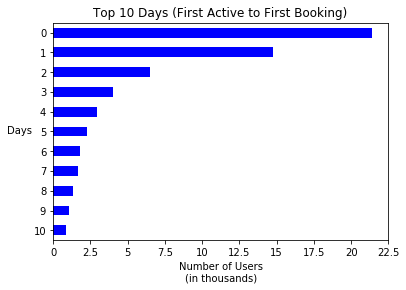

In [136]:
ax = users['days_active_to_booking'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','2.5','5','7.5','10','12.5','15','17.5','20','22.5'])
ax.set_yticklabels(['10','9','8','7','6','5','4','3','2','1','0'])
ax.set_title('Top 10 Days (First Active to First Booking)', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')
ax.set_ylabel('Days').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [137]:
users['days_active_to_booking'] = users['days_active_to_booking'].fillna(0)
users['days_active_to_booking'].value_counts()/users.shape[0]*100

0.0       68.374202
1.0        6.922594
2.0        3.055574
3.0        1.881506
4.0        1.375992
5.0        1.057410
6.0        0.835809
7.0        0.776309
8.0        0.616549
9.0        0.490991
10.0       0.414156
11.0       0.363558
12.0       0.317176
13.0       0.314365
14.0       0.308275
15.0       0.261893
16.0       0.245027
17.0       0.208015
21.0       0.185527
18.0       0.183653
19.0       0.178031
20.0       0.176157
24.0       0.141488
22.0       0.138677
28.0       0.138677
23.0       0.137271
29.0       0.133992
25.0       0.126496
27.0       0.123216
26.0       0.114315
            ...    
479.0      0.000469
712.0      0.000469
661.0      0.000469
522.0      0.000469
1031.0     0.000469
425.0      0.000469
771.0      0.000469
385.0      0.000469
468.0      0.000469
367.0      0.000469
1039.0     0.000469
644.0      0.000469
445.0      0.000469
532.0      0.000469
593.0      0.000469
714.0      0.000469
1337.0     0.000469
447.0      0.000469
555.0      0.000469


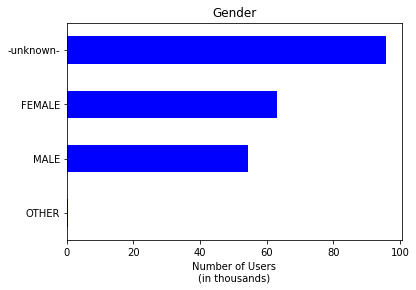

In [138]:
ax = users['gender'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100'])
ax.set_title('Gender', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)').set_rotation(0)

In [139]:
# Check gender

users['gender'].value_counts()/users.shape[0]*100

-unknown-    44.829137
FEMALE       29.533934
MALE         25.504812
OTHER         0.132118
Name: gender, dtype: float64

In [140]:
# Label other gender as unknown

users['gender'] = users['gender'].apply(lambda x:'-unknown-' if x == 'OTHER' else x)

In [141]:
users['gender'].value_counts()/users.shape[0]*100

-unknown-    44.961255
FEMALE       29.533934
MALE         25.504812
Name: gender, dtype: float64

In [142]:
# Check age

users['age'].value_counts()/users.shape[0]*100

30.0      2.869110
31.0      2.818511
29.0      2.793681
28.0      2.782437
32.0      2.743083
27.0      2.688268
33.0      2.589414
26.0      2.363127
34.0      2.356099
35.0      2.276923
25.0      2.089053
36.0      1.912896
37.0      1.730649
38.0      1.584944
24.0      1.508578
39.0      1.404571
40.0      1.295878
41.0      1.188591
23.0      1.153453
42.0      1.050383
45.0      1.006812
44.0      1.001190
43.0      0.963241
46.0      0.878442
22.0      0.797391
47.0      0.771155
48.0      0.688230
50.0      0.649813
51.0      0.626388
49.0      0.623577
            ...   
94.0      0.005622
97.0      0.004685
15.0      0.003748
2.0       0.003280
113.0     0.001874
1949.0    0.001406
1932.0    0.001406
1931.0    0.001406
4.0       0.001406
1924.0    0.000937
1.0       0.000937
1936.0    0.000937
111.0     0.000937
1947.0    0.000937
1929.0    0.000937
1928.0    0.000937
1926.0    0.000469
132.0     0.000469
1927.0    0.000469
1952.0    0.000469
1925.0    0.000469
2008.0    0.

In [143]:
# Check stats of age

users['age'].describe()

count    125457.000000
mean         49.668508
std         155.669085
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [144]:
# Replace ages that do not make sense with np.nan

users['age'] = users['age'].apply(lambda x: np.nan if x < 15 else x)
users['age'] = users['age'].apply(lambda x: np.nan if x > 100 else x)

In [145]:
users['age'].std()

11.690652127876056

In [146]:
# Impute missing ages with mean age

users['age'] = users['age'].fillna(users['age'].mean())

In [147]:
users['age'].value_counts()/users.shape[0]*100

36.558961     42.348416
30.000000      2.869110
31.000000      2.818511
29.000000      2.793681
28.000000      2.782437
32.000000      2.743083
27.000000      2.688268
33.000000      2.589414
26.000000      2.363127
34.000000      2.356099
35.000000      2.276923
25.000000      2.089053
36.000000      1.912896
37.000000      1.730649
38.000000      1.584944
24.000000      1.508578
39.000000      1.404571
40.000000      1.295878
41.000000      1.188591
23.000000      1.153453
42.000000      1.050383
45.000000      1.006812
44.000000      1.001190
43.000000      0.963241
46.000000      0.878442
22.000000      0.797391
47.000000      0.771155
48.000000      0.688230
50.000000      0.649813
51.000000      0.626388
                ...    
74.000000      0.057626
75.000000      0.044039
77.000000      0.033732
76.000000      0.031858
17.000000      0.031390
79.000000      0.023425
78.000000      0.023425
95.000000      0.022957
80.000000      0.021551
87.000000      0.014524
81.000000      0

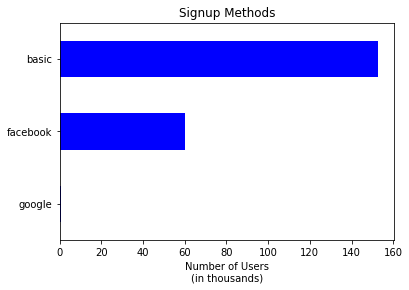

In [148]:
ax = users['signup_method'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100','120','140','160'])
ax.set_title('Signup Methods', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)').set_rotation(0)

In [149]:
# Check signup_method

users['signup_method'].value_counts()/users.shape[0]*100

basic       71.631701
facebook    28.112497
google       0.255802
Name: signup_method, dtype: float64

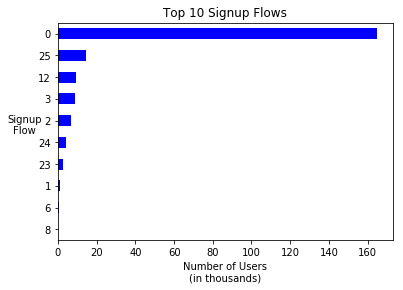

In [150]:
ax = users['signup_flow'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100','120','140','160'])
ax.set_title('Top 10 Signup Flows', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')
ax.set_ylabel('Signup\nFlow').set_rotation(0)
ax.yaxis.set_label_coords(-0.1,0.48)

In [151]:
# Check signup_flow

users['signup_flow'].value_counts()/users.shape[0]*100

0     77.178771
25     6.867779
12     4.370660
3      4.132661
2      3.223766
24     2.027679
23     1.328205
1      0.490522
6      0.141019
8      0.112441
21     0.091827
5      0.016866
20     0.006559
16     0.005154
15     0.004685
10     0.000937
4      0.000469
Name: signup_flow, dtype: float64

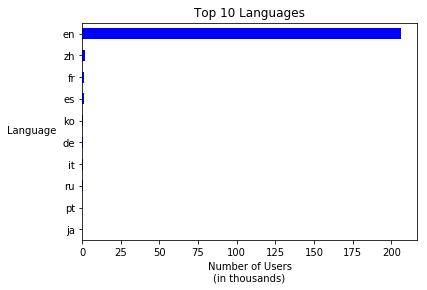

In [152]:
ax = users['language'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','25','50','75','100','125','150','175','200'])
ax.set_title('Top 10 Languages', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')
ax.set_ylabel('Language').set_rotation(0)
ax.yaxis.set_label_coords(-0.15,0.48)

In [153]:
# Check language
# Do not need to consider language as 96.7% are en

users['language'].value_counts()/users.shape[0]*100

en    96.656297
zh     0.764596
fr     0.549085
es     0.428680
ko     0.349971
de     0.342944
it     0.240810
ru     0.182248
pt     0.112441
ja     0.105413
sv     0.057157
nl     0.045445
tr     0.029984
da     0.027173
pl     0.025299
cs     0.014992
no     0.014055
el     0.011244
th     0.011244
id     0.010307
hu     0.008433
fi     0.006559
ca     0.002343
is     0.002343
hr     0.000937
Name: language, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

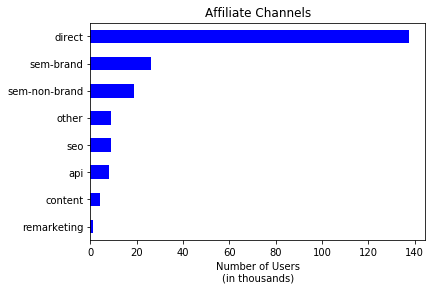

In [154]:
ax = users['affiliate_channel'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100','120','140'])
ax.set_title('Affiliate Channels', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [155]:
# Check affiliate_channel

users['affiliate_channel'].value_counts()/users.shape[0]*100

direct           64.523580
sem-brand        12.202149
sem-non-brand     8.828462
other             4.198252
seo               4.058169
api               3.826261
content           1.849648
remarketing       0.513479
Name: affiliate_channel, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

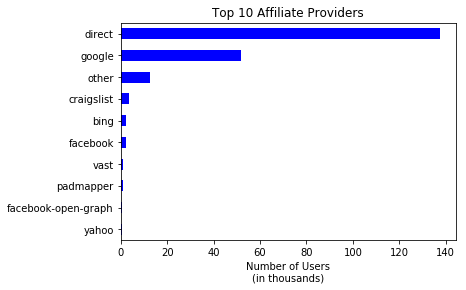

In [156]:
ax = users['affiliate_provider'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100','120','140'])
ax.set_title('Top 10 Affiliate Providers', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [157]:
# Check affiliate_provider

users['affiliate_provider'].value_counts()/users.shape[0]*100

direct                 64.382560
google                 24.217835
other                   5.879239
craigslist              1.626172
bing                    1.090674
facebook                1.064906
vast                    0.388389
padmapper               0.359810
facebook-open-graph     0.255334
yahoo                   0.232377
gsp                     0.212232
meetup                  0.162570
email-marketing         0.077771
naver                   0.024362
baidu                   0.013587
yandex                  0.007965
wayn                    0.003748
daum                    0.000469
Name: affiliate_provider, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

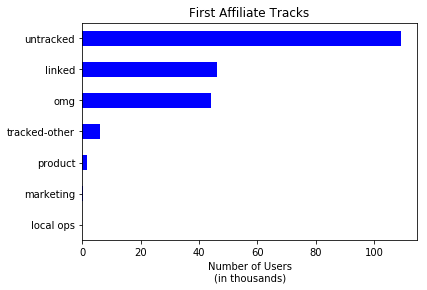

In [158]:
ax = users['first_affiliate_tracked'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','60','80','100'])
ax.set_title('First Affiliate Tracks', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [159]:
# Check first_affiliate_tracked

users['first_affiliate_tracked'].value_counts()/users.shape[0]*100

untracked        51.173130
linked           21.685579
omg              20.605680
tracked-other     2.884102
product           0.728990
marketing         0.065122
local ops         0.015929
Name: first_affiliate_tracked, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

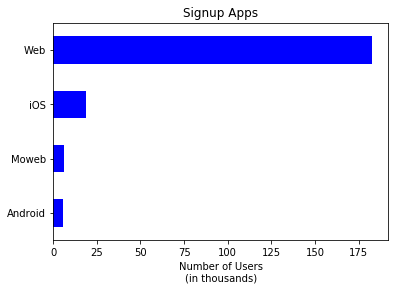

In [160]:
ax = users['signup_app'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','25','50','75','100','125','150','175'])
ax.set_title('Signup Apps', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [161]:
# Check signup_app

users['signup_app'].value_counts()/users.shape[0]*100

Web        85.601042
iOS         8.910450
Moweb       2.933295
Android     2.555213
Name: signup_app, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

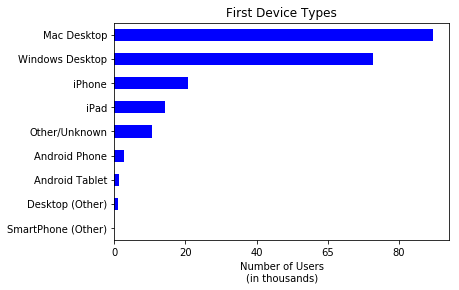

In [162]:
ax = users['first_device_type'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','20','40','65','80'])
ax.set_title('First Device Types', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [163]:
# Check first_device_type

users['first_device_type'].value_counts()/users.shape[0]*100

Mac Desktop           41.975956
Windows Desktop       34.067165
iPhone                 9.725645
iPad                   6.717858
Other/Unknown          4.997517
Android Phone          1.313213
Android Tablet         0.605305
Desktop (Other)        0.561735
SmartPhone (Other)     0.035606
Name: first_device_type, dtype: float64

Text(0.5, 0, 'Number of Users\n(in thousands)')

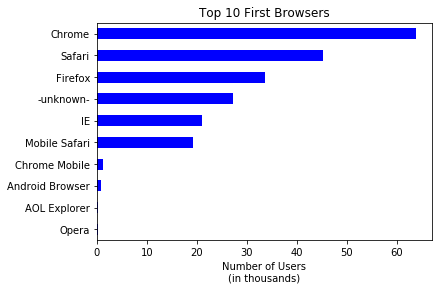

In [164]:
ax = users['first_browser'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','10','20','30','40','50','60'])
ax.set_title('Top 10 First Browsers', y = 1) 
ax.set_xlabel('Number of Users\n(in thousands)')

In [165]:
# Check first_browser

users['first_browser'].value_counts()/users.shape[0]*100

Chrome                  29.910141
Safari                  21.161793
Firefox                 15.766986
-unknown-               12.774191
IE                       9.869944
Mobile Safari            9.029919
Chrome Mobile            0.594998
Android Browser          0.398696
AOL Explorer             0.114783
Opera                    0.088078
Silk                     0.058094
Chromium                 0.034201
BlackBerry Browser       0.024831
Maxthon                  0.021551
IE Mobile                0.016866
Apple Mail               0.016866
Sogou Explorer           0.015461
Mobile Firefox           0.014055
RockMelt                 0.011244
SiteKiosk                0.011244
Iron                     0.007965
IceWeasel                0.006091
Pale Moon                0.005622
SeaMonkey                0.005154
CometBird                0.005154
Yandex.Browser           0.005154
Camino                   0.004217
TenFourFox               0.003748
CoolNovo                 0.002811
wOSBrowser    

In [166]:
users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,hour_first_active,date_first_active,booking,year_account_created,month_account_created,year_first_booking,month_first_booking,days_active_to_created,days_created_to_booking,days_active_to_booking
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,36.558961,basic,0,en,other,...,21,2010-01-01,1,2010,1,2010,1,0,1.0,1.0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.000000,basic,0,en,other,...,1,2010-01-02,1,2010,1,2010,1,0,3.0,3.0
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.000000,basic,0,en,direct,...,19,2010-01-03,1,2010,1,2010,1,0,10.0,10.0
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.000000,basic,0,en,other,...,0,2010-01-04,1,2010,1,2010,7,0,206.0,206.0
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.000000,basic,0,en,other,...,2,2010-01-04,1,2010,1,2010,1,0,0.0,0.0
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.000000,basic,0,en,other,...,19,2010-01-04,1,2010,1,2010,1,0,2.0,2.0
11,om1ss59ys8,2010-01-05,20100105051812,NaT,FEMALE,47.000000,basic,0,en,other,...,5,2010-01-05,0,2010,1,nan,nan,0,0.0,0.0
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,36.558961,basic,0,en,direct,...,6,2010-01-05,1,2010,1,2010,1,0,13.0,13.0
13,dy3rgx56cu,2010-01-05,20100105083259,NaT,FEMALE,37.000000,basic,0,en,other,...,8,2010-01-05,0,2010,1,nan,nan,0,0.0,0.0
14,ju3h98ch3w,2010-01-07,20100107055820,NaT,FEMALE,36.000000,basic,0,en,other,...,5,2010-01-07,0,2010,1,nan,nan,0,0.0,0.0


In [167]:
sessions = pd.read_csv('./sessions.csv')
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


Text(0.5, 0, 'Counts (in thousands)')

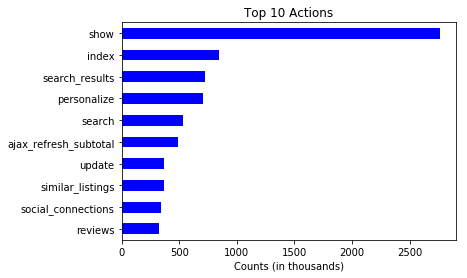

In [168]:
ax = sessions['action'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500'])
ax.set_title('Top 10 Actions', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

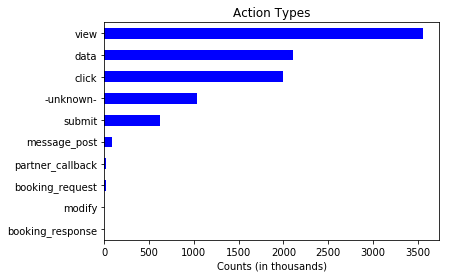

In [169]:
ax = sessions['action_type'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500','3000','3500'])
ax.set_title('Action Types', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

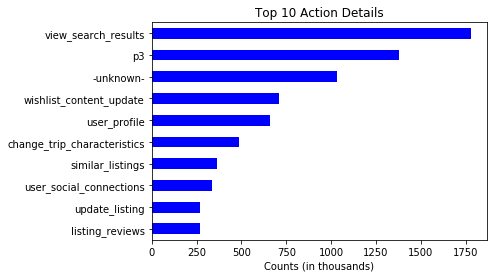

In [170]:
ax = sessions['action_detail'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','250','500','750','1000','1250','1500','1750'])
ax.set_title('Top 10 Action Details', y = 1) 
ax.set_xlabel('Counts (in thousands)')

Text(0.5, 0, 'Counts (in thousands)')

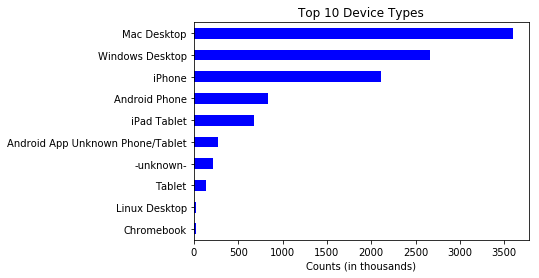

In [171]:
ax = sessions['device_type'].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = 'blue', rot = 0)
ax.set_xticklabels(['0','500','1000','1500','2000','2500','3000','3500'])
ax.set_title('Top 10 Device Types', y = 1) 
ax.set_xlabel('Counts (in thousands)')

In [172]:
# Find the percentage of null entries for features with null

sessions.isnull().sum()[sessions.isnull().sum() != 0]/sessions.shape[0]*100

user_id           0.326428
action            0.753482
action_type      10.657003
action_detail    10.657003
secs_elapsed      1.287229
dtype: float64

In [173]:
# Remove rows that have missing user_id

sessions.dropna(subset = ['user_id'], axis = 0, inplace = True)

In [174]:
sessions['secs_elapsed'].max()

1799977.0

In [175]:
sessions['secs_elapsed'].min()

0.0

In [176]:
sessions[sessions['secs_elapsed'] == 0]

,user_id,action,action_type,action_detail,device_type,secs_elapsed
194,ncf87guaf0,personalize,data,wishlist_content_update,Windows Desktop,0.0
320,xwxei6hdk4,NaN,message_post,message_post,iPad Tablet,0.0
743,qtw88d9pbl,other_hosting_reviews_first,-unknown-,-unknown-,Mac Desktop,0.0
1026,ucgks2fyez,ajax_refresh_subtotal,click,change_trip_characteristics,iPad Tablet,0.0
1810,jrqykh9y8x,search_results,click,view_search_results,Mac Desktop,0.0
1811,jrqykh9y8x,search_results,click,view_search_results,Mac Desktop,0.0
1812,jrqykh9y8x,search_results,click,view_search_results,Mac Desktop,0.0
2024,jrqykh9y8x,listings,-unknown-,-unknown-,Android App Unknown Phone/Tablet,0.0
2340,s9xrwtyzsq,pending,booking_request,pending,iPad Tablet,0.0
3263,toga865pvz,index,-unknown-,-unknown-,iPhone,0.0


In [177]:
sessions['secs_elapsed'].std()

88909.20076555545

In [178]:
# Remove rows that have missing secs_elapsed

sessions.dropna(subset = ['secs_elapsed'], axis = 0, inplace = True)

In [179]:
# Remove rows where secs_elapsed is 0

sessions = sessions[sessions['secs_elapsed'] != 0]

In [180]:
# Find the percentage of null entries for features with null

sessions.isnull().sum()[sessions.isnull().sum() != 0]/sessions.shape[0]*100

action            0.574077
action_type      10.790450
action_detail    10.790450
dtype: float64

In [181]:
# Check action

sessions['action'].value_counts()/sessions.shape[0]*100

show                           26.583558
index                           8.108894
search_results                  6.947887
personalize                     6.783237
search                          5.145370
ajax_refresh_subtotal           4.680800
update                          3.494466
similar_listings                3.486927
social_connections              3.254118
reviews                         3.074498
active                          1.698867
similar_listings_v2             1.630056
lookup                          1.562993
dashboard                       1.474024
header_userpic                  1.356288
collections                     1.196962
edit                            1.052928
campaigns                       0.976199
create                          0.776469
track_page_view                 0.774215
unavailabilities                0.751414
qt2                             0.624100
notifications                   0.569803
confirm_email                   0.563362
requested       

In [182]:
# Create df for time taken for action

action_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_df = action_df.reset_index()

new_names = [(i,'action_'+i) for i in action_df.iloc[:, 1:].columns.values]
action_df = action_df.rename(columns = dict(new_names))

action_df.head()

action,user_id,action_10,action_11,action_12,action_15,action_about_us,action_accept_decline,action_account,action_acculynk_bin_check_failed,action_acculynk_bin_check_success,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0010k6l0om,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001wyh0pz8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,002qnbzfs5,301482,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# Check action_type

sessions['action_type'].value_counts()/sessions.shape[0]*100

view                34.183387
data                20.168683
click               19.097034
-unknown-            9.779908
submit               5.090083
message_post         0.644695
booking_request      0.138001
partner_callback     0.096674
modify               0.011056
booking_response     0.000029
Name: action_type, dtype: float64

In [184]:
# Create df for time taken for action_type

action_type_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action_type'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_type_df = action_type_df.reset_index()

new_names = [(i,'action_type_'+i) for i in action_type_df.iloc[:, 1:].columns.values]
action_type_df = action_type_df.rename(columns = dict(new_names))
action_type_df.drop(['action_type_-unknown-'], axis = 1, inplace = True)

action_type_df.head()

action_type,user_id,action_type_booking_request,action_type_booking_response,action_type_click,action_type_data,action_type_message_post,action_type_modify,action_type_partner_callback,action_type_submit,action_type_view
0,00023iyk9l,0,0,590691,7043,129817,0,0,0,139368
1,0010k6l0om,0,0,65954,136246,0,0,0,0,260196
2,001wyh0pz8,0,0,158796,1550,0,0,0,50906,44516
3,0028jgx1x1,0,0,199802,8603,0,0,0,0,88116
4,002qnbzfs5,70986,0,644323,293735,325235,0,0,1537719,284735


In [185]:
# Check action_detail

sessions['action_detail'].value_counts()/sessions.shape[0]*100

view_search_results               17.049594
p3                                13.201930
-unknown-                          9.779627
wishlist_content_update            6.783237
user_profile                       6.308612
change_trip_characteristics        4.680800
similar_listings                   3.486927
user_social_connections            3.232881
listing_reviews                    2.579617
update_listing                     2.579306
dashboard                          1.474024
user_wishlists                     1.469225
header_userpic                     1.356288
message_thread                     1.277888
edit_profile                       1.049110
contact_host                       0.773341
unavailable_dates                  0.746460
message_post                       0.644695
confirm_email_link                 0.560418
change_contact_host_dates          0.502624
user_profile_content_update        0.485593
user_reviews                       0.476403
p5                              

In [186]:
# Create df for time taken for action_detail

action_detail_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['action_detail'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
action_detail_df = action_detail_df.reset_index()

new_names = [(i,'action_detail_'+i) for i in action_detail_df.iloc[:, 1:].columns.values]
action_detail_df = action_detail_df.rename(columns = dict(new_names))
action_detail_df.drop(['action_detail_-unknown-'], axis = 1, inplace = True)

action_detail_df.head()

action_detail,user_id,action_detail_account_notification_settings,action_detail_account_payment_methods,action_detail_account_payout_preferences,action_detail_account_privacy_settings,action_detail_account_transaction_history,action_detail_admin_templates,action_detail_airbnb_picks_wishlists,action_detail_alteration_field,action_detail_alteration_request,...,action_detail_view_resolutions,action_detail_view_search_results,action_detail_view_security_checks,action_detail_view_user_real_names,action_detail_wishlist,action_detail_wishlist_content_update,action_detail_wishlist_note,action_detail_your_listings,action_detail_your_reservations,action_detail_your_trips
0,00023iyk9l,0,0,0,0,0,0,0,0,0,...,0,54791,0,0,0,3515,0,0,0,1466
1,0010k6l0om,0,0,0,0,0,0,0,0,0,...,0,75951,0,0,0,135661,0,0,0,0
2,001wyh0pz8,0,0,0,0,0,0,0,0,0,...,0,158796,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,...,0,199802,0,0,0,0,0,0,0,0
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,...,0,493417,0,0,0,0,0,0,0,0


In [187]:
# Check device_type

sessions['device_type'].value_counts()/sessions.shape[0]*100

Mac Desktop                         34.050098
Windows Desktop                     25.103821
iPhone                              19.926392
Android Phone                        7.941515
iPad Tablet                          6.470668
Android App Unknown Phone/Tablet     2.612211
-unknown-                            1.983137
Tablet                               1.330359
Linux Desktop                        0.264286
Chromebook                           0.210387
iPodtouch                            0.078303
Windows Phone                        0.019012
Blackberry                           0.009171
Opera Phone                          0.000641
Name: device_type, dtype: float64

In [188]:
# Create df for time taken on device_type

device_type_df = pd.pivot_table(sessions, index = ['user_id'], columns = ['device_type'], values = 'secs_elapsed', aggfunc = sum, fill_value = 0)
device_type_df = device_type_df.reset_index()

new_names = [(i,'device_type_'+i) for i in device_type_df.iloc[:, 1:].columns.values]
device_type_df = device_type_df.rename(columns = dict(new_names))
device_type_df.drop(['device_type_-unknown-'], axis = 1, inplace = True)

device_type_df.head()

device_type,user_id,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Blackberry,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
0,00023iyk9l,0,0,0,0,0,295642,0,0,0,0,0,572254,0
1,0010k6l0om,0,0,0,0,0,586543,0,0,0,0,0,0,0
2,001wyh0pz8,282965,0,0,0,0,0,0,0,0,0,0,0,0
3,0028jgx1x1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,002qnbzfs5,0,0,0,0,0,0,0,0,0,0,0,6283569,0


In [189]:
# Create df for total time taken by each user

secs_elapsed_df = sessions.groupby(['user_id'])['secs_elapsed'].sum().reset_index()

secs_elapsed_df.head()

,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0


In [190]:
# Put all df together

sessions_df = pd.merge(secs_elapsed_df, device_type_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_detail_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_type_df, how = 'left',  on = 'user_id')
sessions_df = pd.merge(sessions_df, action_df, how = 'left',  on = 'user_id')

In [191]:
sessions_df

,user_id,secs_elapsed,device_type_Android App Unknown Phone/Tablet,device_type_Android Phone,device_type_Blackberry,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,00023iyk9l,867896.0,0,0,0,0,0,295642,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0010k6l0om,586543.0,0,0,0,0,0,586543,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001wyh0pz8,282965.0,282965,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0028jgx1x1,297010.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,002qnbzfs5,6487080.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0031awlkjq,39574.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0035hobuyj,5724670.0,0,0,0,0,0,5724670,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,00378ocvlh,1827164.0,0,0,0,0,0,1827164,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,00389675gq,2605711.0,0,236259,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,003iamz20l,1590236.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
# Create df for model

df = users[['year_first_active','id','booking']]

In [193]:
# Apply one hot encoding to categorical features

dummy1 = pd.get_dummies(users[['gender','signup_method','affiliate_channel',
                               'affiliate_provider','signup_app','first_device_type',
                               'first_browser']], drop_first = True)
dummy2 = pd.get_dummies(users[['first_affiliate_tracked']], drop_first = True, dummy_na = True)

In [194]:
# Put df and dummy together

dummy = pd.concat([dummy1, dummy2], axis = 1)
df = pd.concat([df, dummy], axis = 1)

In [195]:
# Include numerical features in df

df['age'] = users['age']
df['signup_flow'] = users['signup_flow']
df['hour_first_active'] = users['hour_first_active']
df['days_created_to_booking'] = users['days_created_to_booking']
df['days_active_to_booking'] = users['days_active_to_booking']

In [196]:
# Put df and sessions_df together

df = df.rename(columns = {'id': 'user_id'})
df = pd.merge(df, sessions_df, how = 'left', on = 'user_id')
df = df.fillna(0)

In [197]:
df

,year_first_active,user_id,booking,gender_FEMALE,gender_MALE,signup_method_facebook,signup_method_google,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,2010,osr2jwljor,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,lsw9q7uk0j,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,0d01nltbrs,1,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,a1vcnhxeij,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,6uh8zyj2gn,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2010,yuuqmid2rp,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2010,om1ss59ys8,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2010,k6np330cm1,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2010,dy3rgx56cu,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2010,ju3h98ch3w,0,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
# Train set is based on 2010 to 2013 year_first_active
# Test set is based on 2014 year_first_active

X_train = df[df['year_first_active'] != '2014'].iloc[:,3:]
y_train = df[df['year_first_active'] != '2014']['booking']

X_test = df[df['year_first_active'] == '2014'].iloc[:,3:]
y_test = df[df['year_first_active'] == '2014']['booking']

In [264]:
# Standarise numerical features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.iloc[:,97:] = ss.fit_transform(X_train.iloc[:,97:]) 
X_test.iloc[:,97:] = ss.transform(X_test.iloc[:,97:])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [265]:
# Try logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Roc-auc scores: [0.88226595 0.92573287 0.92553008 0.91684136 0.91519333]
Mean roc-auc score: 0.91311271946606
Standard deviation of roc-auc scores: 0.016020073292761425


In [88]:
# Do gridsearch on logistic regression model

from sklearn.model_selection import GridSearchCV

lr_parameter = {'penalty' : ['l1', 'l2'], 
                'solver' : ['liblinear']}

lr_gridsearch = GridSearchCV(lr, lr_parameter, cv = 5, scoring = 'roc_auc')
lr_gridsearch.fit(X_train, y_train)
gs_score = lr_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best roc-auc score: 0.9131126346693018


In [89]:
# Find the best parameters
# Parameters are the same as in the default model

parameters = lr_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'penalty': 'l2', 'solver': 'liblinear'}


In [90]:
# Calculate the test score

from sklearn.metrics import roc_auc_score

lr.fit(X_train, y_train)
y_pred_prob_lr = lr.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_prob_lr[:,1])

print('Roc-auc score:',score)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Roc-auc score: 0.9210261743347687


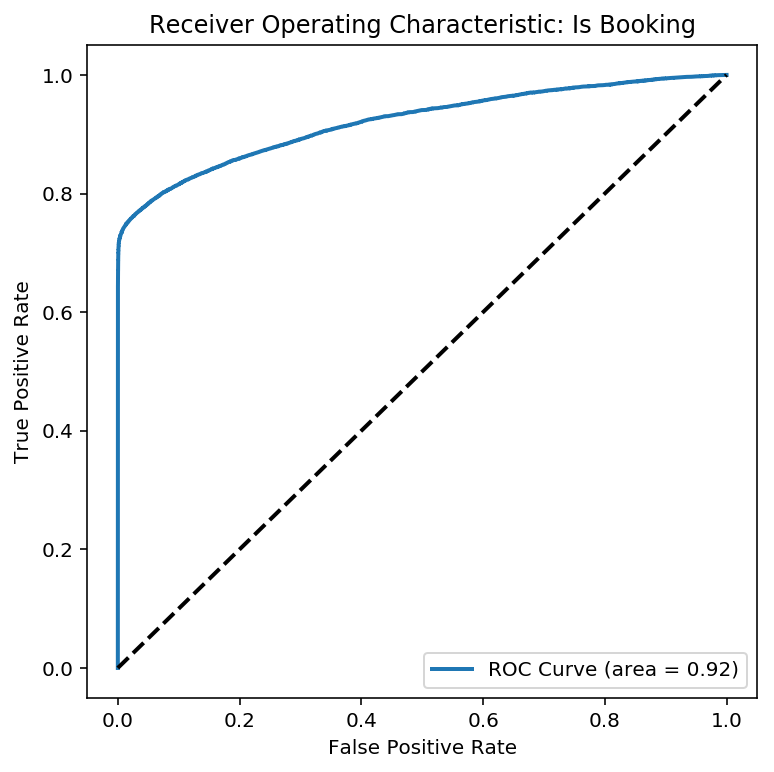

In [91]:
# Plot the roc-auc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is Booking')
plt.legend(loc = "lower right")
plt.show()

In [92]:
# Check the precision, recall and f1 scores

from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     47213
           1       1.00      0.71      0.83     29217

   micro avg       0.89      0.89      0.89     76430
   macro avg       0.92      0.85      0.87     76430
weighted avg       0.90      0.89      0.88     76430



In [93]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_lr, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_non-booking', 'is_booking'],
                                columns = ['predicted_non-booking','predicted_booking'])
confusion_matrix

,predicted_non-booking,predicted_booking
is_non-booking,47164,49
is_booking,8578,20639


In [94]:
# Try knn model
# Score is not too good

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cv_scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.71827253 0.76573459 0.80811293 0.81261292 0.82336806]
Mean roc-auc score: 0.7856202060865143
Standard deviation of roc-auc scores: 0.038963000259790104


In [95]:
# Try random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
cv_scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Roc-auc scores: [0.91540786 0.91770636 0.91263304 0.90583207 0.91050148]
Mean roc-auc score: 0.9124161637233742
Standard deviation of roc-auc scores: 0.004098774473706523


In [96]:
# Do gridsearch on random forest model

rf_parameter = {'n_estimators': [150, 200, 250],
                'min_samples_leaf' : [1, 3, 5, 7],
                'max_features': ['auto', 'log2']}

rf_gridsearch = GridSearchCV(rf, rf_parameter, cv = 5, scoring = 'roc_auc')
rf_gridsearch.fit(X_train, y_train)
gs_score = rf_gridsearch.best_score_

print('Best roc-auc score:', gs_score)

Best roc-auc score: 0.9335447438333124


In [97]:
# Find the best parameters

parameters = rf_gridsearch.best_params_

print('Best parameters:', parameters)

Best parameters: {'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 250}


In [98]:
# Check the train scores

best_rf = RandomForestClassifier(n_estimators = 250, min_samples_leaf = 3)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv = 5, scoring = 'roc_auc')

print('Roc-auc scores:', cv_scores)
print('Mean roc-auc score:', np.mean(cv_scores))
print('Standard deviation of roc-auc scores:', np.std(cv_scores))

Roc-auc scores: [0.93007351 0.93771713 0.93364528 0.93188393 0.92805339]
Mean roc-auc score: 0.9322746490975197
Standard deviation of roc-auc scores: 0.0032959325931952253


In [99]:
# Calculate the test score

best_rf.fit(X_train, y_train)
y_pred_prob_rf = best_rf.predict_proba(X_test)
score = roc_auc_score(y_test, y_pred_prob_rf[:,1])

print('Roc-auc score:',score)

Roc-auc score: 0.9303176521759106


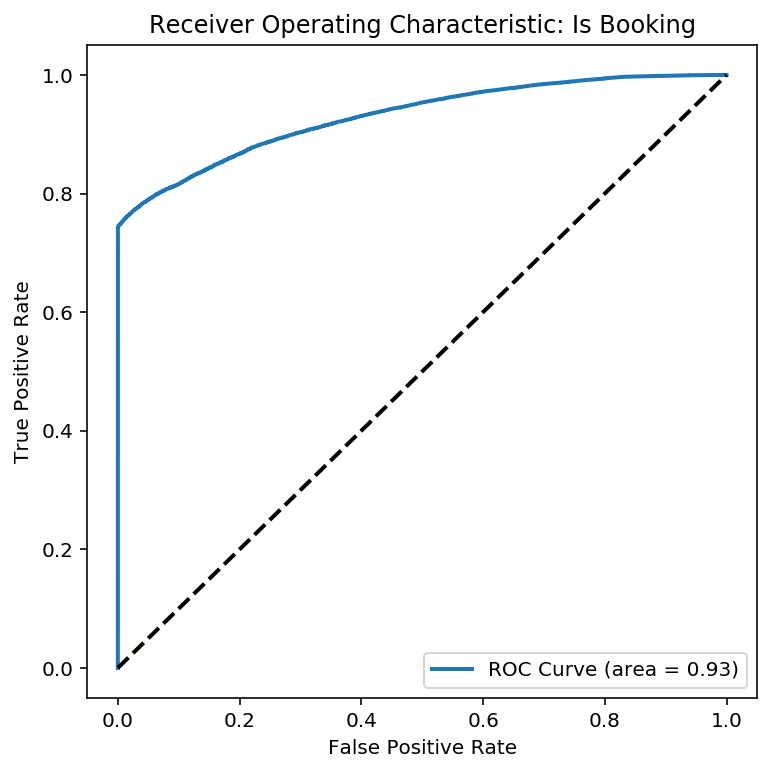

In [100]:
# Plot the roc-auc curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Is Booking')
plt.legend(loc = "lower right")
plt.show()

In [101]:
# Check the precision, recall and f1 scores

y_pred_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     47213
           1       1.00      0.74      0.85     29217

   micro avg       0.90      0.90      0.90     76430
   macro avg       0.93      0.87      0.89     76430
weighted avg       0.92      0.90      0.90     76430



In [102]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(y_test, y_pred_rf, labels = [0,1]))
confusion_matrix = pd.DataFrame(conmat, index = ['is_non-booking', 'is_booking'],
                                columns = ['predicted_non-booking','predicted_booking'])
confusion_matrix

,predicted_non-booking,predicted_booking
is_non-booking,47213,0
is_booking,7490,21727


In [103]:
# Random forest model is selected because it has the highest roc-auc, precision, recall and f1
# score.

fi_df = pd.DataFrame({'feature':X_train.columns,
                      'importance':best_rf.feature_importances_})
fi_df = fi_df.sort_values(by = ['importance'], ascending = False)
fi_df.head(10)

,feature,importance
101,days_active_to_booking,0.465286
100,days_created_to_booking,0.356163
97,age,0.043074
0,gender_FEMALE,0.014702
99,hour_first_active,0.014157
98,signup_flow,0.013144
1,gender_MALE,0.010923
2,signup_method_facebook,0.008334
29,signup_app_Web,0.004588
11,affiliate_provider_bing,0.004213


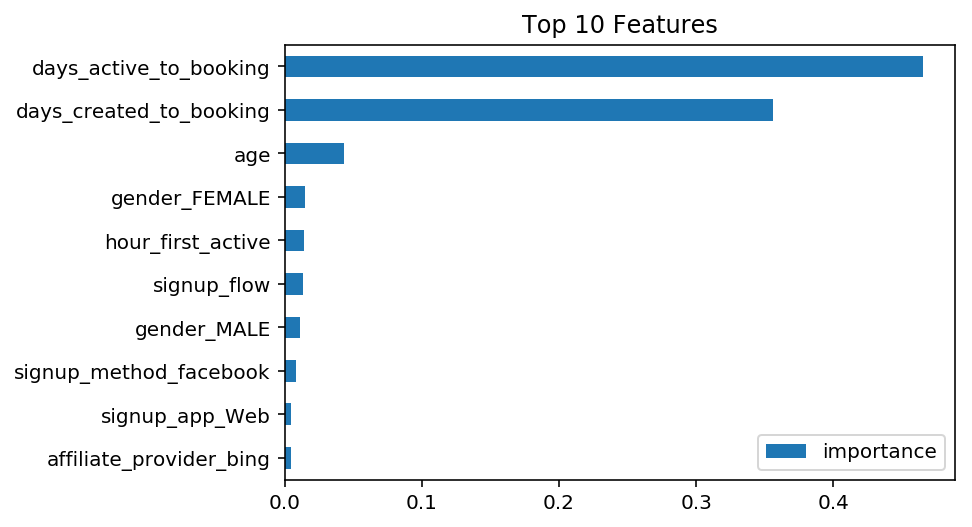

In [104]:
# Plot the top 10 features

fi = fi_df.head(10).sort_values(by = ['importance'])
fi.plot(kind = 'barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.title('Top 10 Features')
plt.legend(loc = "lower right")
plt.show()

In [198]:
# Model 2: Investigate user characteristics that distinguish booking destinations

In [199]:
# Replace imputed ages with np.nan

users['age'] = users['age'].apply(lambda x: round(x,1))
users['age'] = users['age'].apply(lambda x: np.nan if x == 36.6 else x)

In [200]:
# Remove rows that are non-booking

users = users[users['country_destination'] != 'NDF']

In [3]:
countries = pd.read_csv('./countries.csv')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [202]:
# Put users and countries together

users = pd.merge(users, countries, how = 'left',  on = 'country_destination')
users

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,month_first_booking,days_active_to_created,days_created_to_booking,days_active_to_booking,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,...,1,0,1.0,1.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
1,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,1,0,3.0,3.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
2,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,1,0,10.0,10.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
3,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,...,7,0,206.0,206.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
4,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,...,1,0,0.0,0.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
5,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,...,1,0,2.0,2.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
6,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,...,1,0,13.0,13.0,46.232193,2.209667,7682.9450,643801.0,fra,92.06
7,v4d5rl22px,2010-01-07,20100107204555,2010-01-08,FEMALE,33.0,basic,0,en,direct,...,1,0,1.0,1.0,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
8,frhre329au,2010-01-07,20100107224625,2010-01-09,-unknown-,31.0,basic,0,en,other,...,1,0,2.0,2.0,36.966427,-95.844030,0.0000,9826675.0,eng,0.00
9,gdka1q5ktd,2010-01-10,20100110010817,2010-01-10,FEMALE,29.0,basic,0,en,direct,...,1,0,0.0,0.0,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [203]:
# Find the number of rows and columns

users.shape

(88905, 34)

In [204]:
# Find the data type of each feature

users.dtypes

id                                       object
date_account_created             datetime64[ns]
timestamp_first_active                    int64
date_first_booking               datetime64[ns]
gender                                   object
age                                     float64
signup_method                            object
signup_flow                               int64
language                                 object
affiliate_channel                        object
affiliate_provider                       object
first_affiliate_tracked                  object
signup_app                               object
first_device_type                        object
first_browser                            object
country_destination                      object
year_first_active                        object
month_first_active                       object
hour_first_active                         int64
date_first_active                datetime64[ns]
booking                                 

In [205]:
# Find the percentage of null entries for features with null

users.isnull().sum()[users.isnull().sum() != 0]/users.shape[0]*100

age                              24.420449
first_affiliate_tracked           1.954896
lat_destination                  11.352567
lng_destination                  11.352567
distance_km                      11.352567
destination_km2                  11.352567
destination_language             11.352567
language_levenshtein_distance    11.352567
dtype: float64

In [206]:
# Check gender

users['gender'].value_counts()

FEMALE       31991
-unknown-    29193
MALE         27721
Name: gender, dtype: int64

In [207]:
# Check age

users['age'].value_counts()/users.shape[0]*100

30.0     4.115629
31.0     3.987402
32.0     3.901918
29.0     3.867049
28.0     3.829931
27.0     3.675834
33.0     3.624093
34.0     3.303526
26.0     3.138181
35.0     3.085316
36.0     2.646645
25.0     2.610652
37.0     2.330578
38.0     2.130364
24.0     1.933525
39.0     1.818795
40.0     1.646702
41.0     1.540971
23.0     1.427366
42.0     1.305888
44.0     1.245149
45.0     1.218154
43.0     1.182161
46.0     1.052809
22.0     0.959451
47.0     0.912210
48.0     0.781733
50.0     0.772735
51.0     0.752489
49.0     0.715370
           ...   
71.0     0.089984
74.0     0.068613
75.0     0.047241
76.0     0.035993
77.0     0.032619
79.0     0.024746
78.0     0.024746
80.0     0.020246
95.0     0.015747
87.0     0.013498
81.0     0.013498
86.0     0.012373
85.0     0.011248
83.0     0.010123
100.0    0.010123
82.0     0.008998
93.0     0.008998
90.0     0.007874
84.0     0.006749
88.0     0.004499
17.0     0.004499
91.0     0.004499
15.0     0.003374
92.0     0.003374
99.0     0

In [208]:
# Impute missing ages with mean age

users['age'] = users['age'].fillna(users['age'].mean())

In [209]:
users['age'].value_counts()/users.shape[0]*100

36.147662     24.420449
30.000000      4.115629
31.000000      3.987402
32.000000      3.901918
29.000000      3.867049
28.000000      3.829931
27.000000      3.675834
33.000000      3.624093
34.000000      3.303526
26.000000      3.138181
35.000000      3.085316
36.000000      2.646645
25.000000      2.610652
37.000000      2.330578
38.000000      2.130364
24.000000      1.933525
39.000000      1.818795
40.000000      1.646702
41.000000      1.540971
23.000000      1.427366
42.000000      1.305888
44.000000      1.245149
45.000000      1.218154
43.000000      1.182161
46.000000      1.052809
22.000000      0.959451
47.000000      0.912210
48.000000      0.781733
50.000000      0.772735
51.000000      0.752489
                ...    
71.000000      0.089984
74.000000      0.068613
75.000000      0.047241
76.000000      0.035993
77.000000      0.032619
79.000000      0.024746
78.000000      0.024746
80.000000      0.020246
95.000000      0.015747
81.000000      0.013498
87.000000      0

In [210]:
# Check signup_method

users['signup_method'].value_counts()/users.shape[0]*100

basic       73.166864
facebook    26.719532
google       0.113604
Name: signup_method, dtype: float64

In [211]:
# Check signup_flow

users['signup_flow'].value_counts()/users.shape[0]*100

0     78.614251
3      6.314605
25     4.451943
2      4.138125
12     3.447500
24     1.704066
23     0.723244
1      0.190091
6      0.184467
8      0.124852
21     0.094483
15     0.004499
20     0.002250
16     0.002250
5      0.002250
10     0.001125
Name: signup_flow, dtype: float64

In [212]:
# Check language
# Do not need to consider language as 97.5% are en

users['language'].value_counts()/users.shape[0]*100

en    97.475957
zh     0.586019
fr     0.448794
es     0.309319
de     0.303695
ko     0.271076
ru     0.123728
it     0.116979
ja     0.094483
pt     0.069737
sv     0.049491
nl     0.039368
tr     0.022496
da     0.021371
no     0.014622
pl     0.014622
cs     0.010123
fi     0.007874
el     0.006749
th     0.004499
hu     0.004499
is     0.002250
ca     0.002250
Name: language, dtype: float64

In [213]:
# Check affiliate_channel

users['affiliate_channel'].value_counts()/users.shape[0]*100

direct           66.807266
sem-brand        12.478488
sem-non-brand     8.042292
seo               4.448569
other             4.049266
api               3.132557
content           0.627636
remarketing       0.413925
Name: affiliate_channel, dtype: float64

In [214]:
# Check affiliate_provider

users['affiliate_provider'].value_counts()/users.shape[0]*100

direct                 66.622800
google                 23.372139
other                   5.244924
craigslist              1.817671
bing                    0.936955
facebook                0.890839
vast                    0.304820
padmapper               0.283449
yahoo                   0.195715
facebook-open-graph     0.158596
meetup                  0.051741
email-marketing         0.041617
gsp                     0.041617
naver                   0.020246
baidu                   0.011248
yandex                  0.004499
daum                    0.001125
Name: affiliate_provider, dtype: float64

In [215]:
# Check first_affiliate_tracked

users['first_affiliate_tracked'].value_counts()/users.shape[0]*100

untracked        53.693268
linked           22.610652
omg              18.474776
tracked-other     2.575783
product           0.609640
marketing         0.070862
local ops         0.010123
Name: first_affiliate_tracked, dtype: float64

In [216]:
# Check signup_app
# Do not need to consider signup_app as 90.0% are Web

users['signup_app'].value_counts()/users.shape[0]*100

Web        90.003937
iOS         6.198751
Moweb       2.410438
Android     1.386874
Name: signup_app, dtype: float64

In [217]:
# Check first_device_type

users['first_device_type'].value_counts()/users.shape[0]*100

Mac Desktop           47.520387
Windows Desktop       33.913728
iPhone                 7.217817
iPad                   6.145886
Other/Unknown          3.233789
Android Phone          0.804229
Desktop (Other)        0.618638
Android Tablet         0.517406
SmartPhone (Other)     0.028120
Name: first_device_type, dtype: float64

In [218]:
# Check first_browser

users['first_browser'].value_counts()/users.shape[0]*100

Chrome                  33.604409
Safari                  22.182104
Firefox                 17.691918
IE                       8.685676
-unknown-                8.568697
Mobile Safari            8.077161
Chrome Mobile            0.458917
Android Browser          0.314943
Opera                    0.071987
AOL Explorer             0.070862
Silk                     0.048366
Chromium                 0.048366
BlackBerry Browser       0.024746
Maxthon                  0.017997
Apple Mail               0.016872
Mobile Firefox           0.014622
RockMelt                 0.013498
Sogou Explorer           0.010123
Iron                     0.010123
IceWeasel                0.008998
SiteKiosk                0.007874
IE Mobile                0.007874
Camino                   0.007874
SeaMonkey                0.004499
TenFourFox               0.004499
Pale Moon                0.004499
CoolNovo                 0.003374
wOSBrowser               0.003374
TheWorld Browser         0.002250
Opera Mini    

In [219]:
# Check country_destination

users['country_destination'].value_counts()/users.shape[0]*100

US       70.158034
other    11.352567
FR        5.649851
IT        3.188797
GB        2.614026
ES        2.529666
CA        1.606209
DE        1.193409
NL        0.857095
AU        0.606265
PT        0.244081
Name: country_destination, dtype: float64

In [220]:
# Create target column

country = []
for i in users['country_destination']:
    if i == 'US':
        country.append(1)
    elif i == 'FR':
        country.append(2)
    elif i == 'IT':
        country.append(3)
    elif i == 'GB':
        country.append(4)
    elif i == 'ES':
        country.append(5)
    elif i == 'CA':
        country.append(6)
    elif i == 'DE':
        country.append(7)
    elif i == 'NL':
        country.append(8)
    elif i == 'AU':
        country.append(9)
    elif i == 'PT':
        country.append(10)
    else:
        country.append(11)
        
users['country'] = country

In [221]:
# Baseline

users['country'].value_counts()/users.shape[0]

1     0.701580
11    0.113526
2     0.056499
3     0.031888
4     0.026140
5     0.025297
6     0.016062
7     0.011934
8     0.008571
9     0.006063
10    0.002441
Name: country, dtype: float64

In [222]:
# Check hour_first_active

users['hour_first_active'].value_counts()/users.shape[0]*100

19    6.760025
21    6.557561
18    6.511445
20    6.510320
22    6.325853
23    6.293234
4     5.964794
17    5.862437
5     5.761206
0     5.594736
3     5.231427
1     5.133570
2     4.878241
6     4.651032
16    4.397953
7     3.159552
15    2.762499
8     1.906529
14    1.556718
9     1.164164
13    0.953827
10    0.746865
11    0.659131
12    0.656881
Name: hour_first_active, dtype: float64

In [223]:
# Check days_active_to_created
# Do not need to consider days_active_to_created as 99.9% are 0

users['days_active_to_created'].value_counts()/users.shape[0]*100

0       99.863900
1        0.005624
6        0.004499
29       0.003374
4        0.003374
3        0.003374
95       0.002250
37       0.002250
5        0.002250
57       0.002250
634      0.002250
20       0.002250
7        0.002250
18       0.001125
16       0.001125
144      0.001125
17       0.001125
143      0.001125
337      0.001125
78       0.001125
13       0.001125
274      0.001125
210      0.001125
204      0.001125
659      0.001125
851      0.001125
21       0.001125
86       0.001125
216      0.001125
1036     0.001125
          ...    
124      0.001125
636      0.001125
1148     0.001125
125      0.001125
189      0.001125
367      0.001125
47       0.001125
46       0.001125
358      0.001125
62       0.001125
283      0.001125
92       0.001125
349      0.001125
354      0.001125
163      0.001125
995      0.001125
356      0.001125
101      0.001125
103      0.001125
237      0.001125
167      0.001125
40       0.001125
104      0.001125
169      0.001125
106      0

In [224]:
# Check days_created_to_booking

users['days_created_to_booking'].value_counts()/users.shape[0]*100

 0.0      24.075136
 1.0      16.619988
 2.0       7.339295
 3.0       4.520556
 4.0       3.303526
 5.0       2.543164
 6.0       2.010011
 7.0       1.863787
 8.0       1.481357
 9.0       1.176537
 10.0      0.993195
 11.0      0.872842
 12.0      0.762612
 13.0      0.754738
 14.0      0.740116
 15.0      0.628761
 16.0      0.589393
 17.0      0.499409
 21.0      0.446544
 18.0      0.442045
 19.0      0.427423
 20.0      0.424048
 24.0      0.339688
 22.0      0.334064
 28.0      0.331815
 23.0      0.329565
 29.0      0.321692
 25.0      0.302570
 27.0      0.294697
 26.0      0.273325
            ...    
 180.0     0.042742
 283.0     0.042742
 227.0     0.041617
 264.0     0.039368
 300.0     0.039368
 341.0     0.037118
 255.0     0.032619
-4.0       0.003374
-77.0      0.002250
-3.0       0.002250
-1.0       0.001125
-69.0      0.001125
-347.0     0.001125
-167.0     0.001125
-338.0     0.001125
-11.0      0.001125
-308.0     0.001125
-261.0     0.001125
-140.0     0.001125


In [225]:
# Check days_active_to_booking

users['days_active_to_booking'].value_counts()/users.shape[0]*100

0.0       24.071762
1.0       16.619988
2.0        7.335920
3.0        4.517181
4.0        3.303526
5.0        2.538665
6.0        2.006636
7.0        1.863787
8.0        1.480232
9.0        1.178786
10.0       0.994320
11.0       0.872842
12.0       0.761487
13.0       0.754738
14.0       0.740116
15.0       0.628761
16.0       0.588268
17.0       0.499409
21.0       0.445419
18.0       0.440920
19.0       0.427423
20.0       0.422923
24.0       0.339688
22.0       0.332940
28.0       0.332940
23.0       0.329565
29.0       0.321692
25.0       0.303695
27.0       0.295821
26.0       0.274450
            ...    
385.0      0.001125
913.0      0.001125
1031.0     0.001125
771.0      0.001125
712.0      0.001125
593.0      0.001125
425.0      0.001125
479.0      0.001125
447.0      0.001125
1153.0     0.001125
532.0      0.001125
1337.0     0.001125
644.0      0.001125
468.0      0.001125
555.0      0.001125
1369.0     0.001125
661.0      0.001125
522.0      0.001125
714.0      0.001125


In [226]:
from geopy.geocoders import Nominatim

geolocator = Nominatim() 
asia = geolocator.geocode('Asia')

print('Asia latitude:', asia.latitude)
print('Asia longitude:', asia.longitude)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


Asia latitude: 51.2086975
Asia longitude: 89.2343748


In [227]:
# Impute missing lat_destination with lat_destination of Asia

users['lat_destination'] = users['lat_destination'].fillna(asia.latitude)

In [228]:
# Check lat_destination

users['lat_destination'].value_counts()/users.shape[0]*100

 36.966427    70.158034
 51.208697    11.352567
 46.232193     5.649851
 41.873990     3.188797
 54.633220     2.614026
 39.896027     2.529666
 62.393303     1.606209
 51.165707     1.193409
 52.133057     0.857095
-26.853388     0.606265
 39.553444     0.244081
Name: lat_destination, dtype: float64

In [229]:
# Impute missing lng_destination with lng_destination of Asia

users['lng_destination'] = users['lng_destination'].fillna(asia.longitude)

In [230]:
# Check lng_destination

users['lng_destination'].value_counts()/users.shape[0]*100

-95.844030     70.158034
 89.234375     11.352567
 2.209667       5.649851
 12.564167      3.188797
-3.432277       2.614026
-2.487694       2.529666
-96.818146      1.606209
 10.452764      1.193409
 5.295250       0.857095
 133.275160     0.606265
-7.839319       0.244081
Name: lng_destination, dtype: float64

In [231]:
from geopy.distance import great_circle

us = (36.966427, -95.844030)
asia = (51.2086975, 89.2343748)

print('Distance between US and Asia:', great_circle(us, asia).kilometers)

Distance between US and Asia: 10197.950186475564


In [232]:
# Impute missing distance_km with distance between US and Asia

users['distance_km'] = users['distance_km'].fillna(great_circle(us, asia).kilometers)

In [233]:
# Check distance_km

users['distance_km'].value_counts()/users.shape[0]*100

0.000000        70.158034
10197.950186    11.352567
7682.945000      5.649851
8636.631000      3.188797
6883.659000      2.614026
7730.724000      2.529666
2828.133300      1.606209
7879.568000      1.193409
7524.320300      0.857095
15297.744000     0.606265
7355.253400      0.244081
Name: distance_km, dtype: float64

In [234]:
# Impute missing language_levenshtein_distance with mean of non-zero 
# language_levenshtein_distance 

mean_lld = users[users['language_levenshtein_distance'] != 0]['language_levenshtein_distance'].mean()
users['language_levenshtein_distance'] = users['language_levenshtein_distance'].fillna(mean_lld)

In [235]:
# Check language_levenshtein_distance

users['language_levenshtein_distance'].value_counts()/users.shape[0]*100

0.000000     74.984534
88.026849    11.352567
92.060000     5.649851
89.400000     3.188797
92.250000     2.529666
72.610000     1.193409
63.220000     0.857095
95.450000     0.244081
Name: language_levenshtein_distance, dtype: float64

In [239]:
data = users[['country_destination','lat_destination','lng_destination','distance_km',
             'destination_km2','language_levenshtein_distance',
             'gender','signup_method','affiliate_channel','affiliate_provider',
             'first_device_type','first_browser','first_affiliate_tracked','age',
             'signup_flow','hour_first_active','days_created_to_booking','days_active_to_booking']]

In [241]:
data.to_csv('./data.csv')

In [236]:
# Create df1 for model

df1 = users[['year_first_active','id','country']]

In [237]:
# Apply one hot encoding to categorical features

dummy3 = pd.get_dummies(users[['gender','signup_method','affiliate_channel',
                               'affiliate_provider','first_device_type','first_browser']], 
                               drop_first = True)
dummy4 = pd.get_dummies(users[['first_affiliate_tracked']], drop_first = True, dummy_na = True)

In [150]:
# Put df1 and dummy5 together

dummy5 = pd.concat([dummy3, dummy4], axis = 1)
df1 = pd.concat([df1, dummy5], axis = 1)

In [151]:
# Include numerical features in df1

df1['age'] = users['age']
df1['signup_flow'] = users['signup_flow']
df1['hour_first_active'] = users['hour_first_active']
df1['days_created_to_booking'] = users['days_created_to_booking']
df1['days_active_to_booking'] = users['days_active_to_booking']
df1['distance_km'] = users['distance_km']
df1['language_levenshtein_distance'] = users['language_levenshtein_distance']

In [152]:
# Put df1 and sessions_df together

df1 = df1.rename(columns = {'id': 'user_id'})
df1 = pd.merge(df1, sessions_df, how = 'left', on = 'user_id')
df1 = df1.fillna(0)

In [153]:
df1

,year_first_active,user_id,country,gender_FEMALE,gender_MALE,signup_method_facebook,signup_method_google,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,...,action_view,action_views,action_views_campaign,action_views_campaign_rules,action_webcam_upload,action_weibo_signup_referral_finish,action_why_host,action_widget,action_wishlists,action_zendesk_login_jwt
0,2010,osr2jwljor,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,lsw9q7uk0j,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,0d01nltbrs,1,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,a1vcnhxeij,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,6uh8zyj2gn,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2010,yuuqmid2rp,1,1,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2010,k6np330cm1,2,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2010,v4d5rl22px,6,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2010,frhre329au,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2010,gdka1q5ktd,2,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# Train set is based on 2010 to 2013 year_first_active
# Test set is based on 2014 year_first_active

Xn_train = df1[df1['year_first_active'] != '2014'].iloc[:,3:]
yn_train = df1[df1['year_first_active'] != '2014']['country']

Xn_test = df1[df1['year_first_active'] == '2014'].iloc[:,3:]
yn_test = df1[df1['year_first_active'] == '2014']['country']

In [156]:
# Standarise numerical features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn_train.iloc[:,81:] = ss.fit_transform(Xn_train.iloc[:,81:]) 
Xn_test.iloc[:,81:] = ss.transform(Xn_test.iloc[:,81:])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [151]:
# Try logistic regression model with different parameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr')
    lr.fit(X_train_smote, y_train_smote)
    y_pred = lr.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9238884702336096, 0.9312337716726694, 0.928709055876686, 0.9327188940092166, 0.9300318417965476]
Mean f1 score: 0.929316406717746
Standard deviation of f1 scores: 0.003019815392070253


In [162]:
# Calculate the test score

lr_1 = LogisticRegression(penalty = 'l2', solver = 'liblinear', multi_class = 'ovr')
lr_1.fit(Xn_train, yn_train)
yn_pred_lr_1 = lr_1.predict(Xn_test)
score = f1_score(yn_test, yn_pred_lr_1, average = 'micro')

print('f1 score:',score)

f1 score: 0.9303145429031043


In [163]:
# Check the precision, recall and f1 scores

from sklearn.metrics import classification_report

print(classification_report(yn_test, yn_pred_lr_1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20419
           2       0.65      1.00      0.79      1461
           3       0.71      0.73      0.72       994
           4       0.59      1.00      0.74       741
           5       0.42      0.01      0.01       713
           6       1.00      0.10      0.19       450
           7       0.27      0.20      0.23       255
           8       0.74      0.06      0.10       251
           9       0.96      0.15      0.26       152
          10       0.00      0.00      0.00        83
          11       0.93      1.00      0.97      3698

   micro avg       0.93      0.93      0.93     29217
   macro avg       0.66      0.48      0.46     29217
weighted avg       0.93      0.93      0.91     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [164]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_lr_1, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,0,1455,0,0,6,0,0,0,0,0,0
is_IT,0,0,729,0,1,0,0,0,0,0,264
is_GB,0,0,0,740,0,0,0,0,1,0,0
is_ES,0,708,0,0,5,0,0,0,0,0,0
is_CA,9,0,0,395,0,46,0,0,0,0,0
is_DE,0,0,198,0,0,0,52,5,0,0,0
is_NL,0,0,94,0,0,0,143,14,0,0,0
is_AU,0,0,0,129,0,0,0,0,23,0,0
is_PT,0,83,0,0,0,0,0,0,0,0,0


In [154]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    lr = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial')
    lr.fit(X_train_smote, y_train_smote)
    y_pred = lr.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


f1 scores: [0.9833375198861257, 0.9958958036686489, 0.9941358800368602, 0.9984080435693339, 0.9949723479135244]
Mean f1 score: 0.9933499190148986
Standard deviation of f1 scores: 0.005207001041892991


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [165]:
# Calculate the test score

lr_2 = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial')
lr_2.fit(Xn_train, yn_train)
yn_pred_lr_2 = lr_2.predict(Xn_test)
score = f1_score(yn_test, yn_pred_lr_2, average = 'micro')

print('f1 score:',score)

f1 score: 0.972721360851559


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [166]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_lr_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20419
           2       0.65      0.99      0.78      1461
           3       1.00      1.00      1.00       994
           4       1.00      1.00      1.00       741
           5       0.50      0.02      0.04       713
           6       1.00      1.00      1.00       450
           7       1.00      1.00      1.00       255
           8       1.00      1.00      1.00       251
           9       1.00      1.00      1.00       152
          10       0.00      0.00      0.00        83
          11       1.00      1.00      1.00      3698

   micro avg       0.97      0.97      0.97     29217
   macro avg       0.83      0.82      0.80     29217
weighted avg       0.97      0.97      0.96     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [167]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_lr_2, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,0,1448,0,0,13,0,0,0,0,0,0
is_IT,0,0,994,0,0,0,0,0,0,0,0
is_GB,0,0,0,741,0,0,0,0,0,0,0
is_ES,0,700,0,0,13,0,0,0,0,0,0
is_CA,0,0,0,0,0,450,0,0,0,0,0
is_DE,0,0,0,0,0,0,255,0,0,0,0
is_NL,0,0,0,0,0,0,1,250,0,0,0
is_AU,0,0,0,0,0,0,0,0,152,0,0
is_PT,0,83,0,0,0,0,0,0,0,0,0


In [160]:
# Try random forest model with different parameters

from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9582182031315416, 0.9662450791523578, 0.9623858590935745, 0.9721826560536238, 0.9638009049773756]
Mean f1 score: 0.9645665404816948
Standard deviation of f1 scores: 0.004614448279636648


In [168]:
# Calculate the test score

rf_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'auto')
rf_1.fit(Xn_train, yn_train)
yn_pred_rf_1 = rf_1.predict(Xn_test)
score = f1_score(yn_test, yn_pred_rf_1, average = 'micro')

print('f1 score:',score)

f1 score: 0.7104767772187426


In [169]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_rf_1))

              precision    recall  f1-score   support

           1       0.71      1.00      0.83     20419
           2       0.00      0.00      0.00      1461
           3       0.00      0.00      0.00       994
           4       0.00      0.00      0.00       741
           5       0.00      0.00      0.00       713
           6       0.00      0.00      0.00       450
           7       0.00      0.00      0.00       255
           8       0.00      0.00      0.00       251
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        83
          11       1.00      0.09      0.17      3698

   micro avg       0.71      0.71      0.71     29217
   macro avg       0.16      0.10      0.09     29217
weighted avg       0.62      0.71      0.60     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [170]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_rf_1, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,1461,0,0,0,0,0,0,0,0,0,0
is_IT,994,0,0,0,0,0,0,0,0,0,0
is_GB,741,0,0,0,0,0,0,0,0,0,0
is_ES,713,0,0,0,0,0,0,0,0,0,0
is_CA,450,0,0,0,0,0,0,0,0,0,0
is_DE,255,0,0,0,0,0,0,0,0,0,0
is_NL,251,0,0,0,0,0,0,0,0,0,0
is_AU,152,0,0,0,0,0,0,0,0,0,0
is_PT,83,0,0,0,0,0,0,0,0,0,0


In [312]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'log2')
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9048815205559743, 0.9302286623670324, 0.9418614392225853, 0.9116045245077503, 0.9219038042567455]
Mean f1 score: 0.9220959901820175
Standard deviation of f1 scores: 0.013139703836649896


In [171]:
# Calculate the test score

rf_2 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 5, max_features = 'log2')
rf_2.fit(Xn_train, yn_train)
yn_pred_rf_2 = rf_2.predict(Xn_test)
score = f1_score(yn_test, yn_pred_rf_2, average = 'micro')

print('f1 score:',score)

f1 score: 0.6988739432522162


In [172]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_rf_2))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     20419
           2       0.00      0.00      0.00      1461
           3       0.00      0.00      0.00       994
           4       0.00      0.00      0.00       741
           5       0.00      0.00      0.00       713
           6       0.00      0.00      0.00       450
           7       0.00      0.00      0.00       255
           8       0.00      0.00      0.00       251
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00      3698

   micro avg       0.70      0.70      0.70     29217
   macro avg       0.06      0.09      0.07     29217
weighted avg       0.49      0.70      0.57     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [173]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_rf_2, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,1461,0,0,0,0,0,0,0,0,0,0
is_IT,994,0,0,0,0,0,0,0,0,0,0
is_GB,741,0,0,0,0,0,0,0,0,0,0
is_ES,713,0,0,0,0,0,0,0,0,0,0
is_CA,450,0,0,0,0,0,0,0,0,0,0
is_DE,255,0,0,0,0,0,0,0,0,0,0
is_NL,251,0,0,0,0,0,0,0,0,0,0
is_AU,152,0,0,0,0,0,0,0,0,0,0
is_PT,83,0,0,0,0,0,0,0,0,0,0


In [315]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, max_features = 'auto')
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.9547014987858997, 0.9648211743027054, 0.9686688447683672, 0.9669878508588186, 0.9579353108764873]
Mean f1 score: 0.9626229359184556
Standard deviation of f1 scores: 0.0053881489034947085


In [174]:
# Calculate the test score

rf_3 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, max_features = 'auto')
rf_3.fit(Xn_train, yn_train)
yn_pred_rf_3 = rf_3.predict(Xn_test)
score = f1_score(yn_test, yn_pred_rf_3, average = 'micro')

print('f1 score:',score)

f1 score: 0.6988739432522162


In [175]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_rf_3))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     20419
           2       0.00      0.00      0.00      1461
           3       0.00      0.00      0.00       994
           4       0.00      0.00      0.00       741
           5       0.00      0.00      0.00       713
           6       0.00      0.00      0.00       450
           7       0.00      0.00      0.00       255
           8       0.00      0.00      0.00       251
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00      3698

   micro avg       0.70      0.70      0.70     29217
   macro avg       0.06      0.09      0.07     29217
weighted avg       0.49      0.70      0.57     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [176]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_rf_3, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,1461,0,0,0,0,0,0,0,0,0,0
is_IT,994,0,0,0,0,0,0,0,0,0,0
is_GB,741,0,0,0,0,0,0,0,0,0,0
is_ES,713,0,0,0,0,0,0,0,0,0,0
is_CA,450,0,0,0,0,0,0,0,0,0,0
is_DE,255,0,0,0,0,0,0,0,0,0,0
is_NL,251,0,0,0,0,0,0,0,0,0,0
is_AU,152,0,0,0,0,0,0,0,0,0,0
is_PT,83,0,0,0,0,0,0,0,0,0,0


In [318]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, max_features = 'log2')
    rf.fit(X_train_smote, y_train_smote)
    y_pred = rf.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

f1 scores: [0.8642719584693963, 0.9076974620990033, 0.9108653765602748, 0.9167993297025555, 0.8864588570470924]
Mean f1 score: 0.8972185967756644
Standard deviation of f1 scores: 0.01939432542585189


In [177]:
# Calculate the test score

rf_4 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, max_features = 'log2')
rf_4.fit(Xn_train, yn_train)
yn_pred_rf_4 = rf_4.predict(Xn_test)
score = f1_score(yn_test, yn_pred_rf_4, average = 'micro')

print('f1 score:',score)

f1 score: 0.6988739432522162


In [178]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_rf_4))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     20419
           2       0.00      0.00      0.00      1461
           3       0.00      0.00      0.00       994
           4       0.00      0.00      0.00       741
           5       0.00      0.00      0.00       713
           6       0.00      0.00      0.00       450
           7       0.00      0.00      0.00       255
           8       0.00      0.00      0.00       251
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00      3698

   micro avg       0.70      0.70      0.70     29217
   macro avg       0.06      0.09      0.07     29217
weighted avg       0.49      0.70      0.57     29217



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [179]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_rf_4, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

,predicted_US,predicted_FR,predicted_IT,predicted_GB,predicted_ES,predicted_CA,predicted_DE,predicted_NL,predicted_AU,predicted_PT,predicted_others
is_US,20419,0,0,0,0,0,0,0,0,0,0
is_FR,1461,0,0,0,0,0,0,0,0,0,0
is_IT,994,0,0,0,0,0,0,0,0,0,0
is_GB,741,0,0,0,0,0,0,0,0,0,0
is_ES,713,0,0,0,0,0,0,0,0,0,0
is_CA,450,0,0,0,0,0,0,0,0,0,0
is_DE,255,0,0,0,0,0,0,0,0,0,0
is_NL,251,0,0,0,0,0,0,0,0,0,0
is_AU,152,0,0,0,0,0,0,0,0,0,0
is_PT,83,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Try xgboost model with different parameters

import xgboost as xgb

skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    xgb = xgb.XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 100)
    xgb.fit(X_train_smote, y_train_smote)
    y_pred = xgb.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))# Try xgboost model with different parameters

In [ ]:
# Calculate the test score

xgb_1 = xgb.XGBClassifier(max_depth = 3, learning_rate = 0.1, n_estimators = 100)
xgb_1.fit(Xn_train, yn_train)
yn_pred_xgb_1 = xgb_1.predict(Xn_test)
score = f1_score(yn_test, yn_pred_xgb_1, average = 'micro')

print('f1 score:',score)

In [ ]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_xgb_1))

In [ ]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_xgb_1, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

In [ ]:
skf = StratifiedKFold(n_splits = 5)
cv_scores = []

for train_index, test_index in skf.split(Xn_train, yn_train): 
    
    X_train, X_test = Xn_train.loc[train_index], Xn_train.loc[test_index]
    y_train, y_test = yn_train.loc[train_index], yn_train.loc[test_index]
    
    sm = SMOTE(random_state = 42)
    X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

    xgb = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, n_estimators = 100)
    xgb.fit(X_train_smote, y_train_smote)
    y_pred = xgb.predict(X_test)
    score = f1_score(y_test, y_pred, average = 'micro')
    cv_scores.append(score)

print('f1 scores:', cv_scores)
print('Mean f1 score:', np.mean(cv_scores))
print('Standard deviation of f1 scores:', np.std(cv_scores))

In [ ]:
# Calculate the test score

xgb_2 = xgb.XGBClassifier(max_depth = 5, learning_rate = 0.1, n_estimators = 100)
xgb_2.fit(Xn_train, yn_train)
yn_pred_xgb_2 = xgb_2.predict(Xn_test)
score = f1_score(yn_test, yn_pred_xgb_2, average = 'micro')

print('f1 score:',score)

In [ ]:
# Check the precision, recall and f1 scores

print(classification_report(yn_test, yn_pred_xgb_2))

In [ ]:
# Check the number of TP, TN, FP and FN

from sklearn.metrics import confusion_matrix

conmat = np.array(confusion_matrix(yn_test, yn_pred_xgb_2, labels = [1,2,3,4,5,6,7,8,9,10,11]))
confusion_matrix = pd.DataFrame(conmat, 
                                index = ['is_US','is_FR','is_IT','is_GB','is_ES','is_CA',
                                         'is_DE','is_NL','is_AU','is_PT','is_others'],
                                columns = ['predicted_US','predicted_FR','predicted_IT',
                                           'predicted_GB','predicted_ES','predicted_CA',
                                           'predicted_DE','predicted_NL','predicted_AU',
                                           'predicted_PT','predicted_others'])
confusion_matrix

In [204]:
# Logistic regression model is selected because it has the highest precision, recall and f1
# score.

lr_1_df = pd.DataFrame(lr_1.coef_, columns = (Xn_train.columns)).T
lr_1_df.columns = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','others']
lr_1_df

,US,FR,IT,GB,ES,CA,DE,NL,AU,PT,others
gender_FEMALE,-0.021570,0.033144,0.047330,-0.140870,-0.075433,-0.153227,0.092386,0.068660,-0.548722,-0.097537,-0.275195
gender_MALE,-0.127314,-0.147389,-0.270490,-0.135985,0.123096,0.114153,0.309998,0.351816,-0.567930,0.030286,-0.032996
signup_method_facebook,0.078643,-0.191485,0.024806,0.019122,0.149470,-0.206624,0.073326,-0.079003,-0.359005,0.087237,-0.125830
signup_method_google,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
affiliate_channel_content,-0.099212,-0.314259,-0.491118,-1.462005,-0.539283,0.274456,-0.504879,-0.076048,-0.140731,-0.531581,-2.488523
affiliate_channel_direct,-0.198035,-0.620475,-0.560951,-0.321373,-0.211544,-0.251462,-0.692438,0.281820,-1.430568,-0.130095,-2.140188
affiliate_channel_other,-0.223638,-0.540928,-0.067752,-0.620909,-0.415407,-0.197523,0.059252,-0.624190,-0.816419,0.058095,-1.778403
affiliate_channel_remarketing,-0.030645,-0.860115,-0.086050,-0.101591,0.222635,0.118441,-0.644515,-1.024862,-0.092637,-0.575834,-2.013073
affiliate_channel_sem-brand,-0.028439,-0.760697,0.035972,-0.354377,-0.263230,-0.240872,0.031872,-0.469258,-0.790192,-0.265150,-2.773964
affiliate_channel_sem-non-brand,-0.320732,-0.500876,-0.403874,-0.512592,-0.452248,0.392053,-0.020346,-0.388316,-0.850381,-0.599006,-2.555834


In [206]:
for i in lr_1_df.columns:
    df_i = lr_1_df[[i]]
    df_i['odds ratio'] = df_i[i].apply(lambda x : np.exp(x))
    df_i = df_i.sort_values(by = ['odds ratio'], ascending = False)
    print(df_i.head(10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                        US  odds ratio
language_levenshtein_distance     0.698479    2.010692
signup_method_facebook            0.078643    1.081818
hour_first_active                 0.018468    1.018640
first_browser_Opera               0.015224    1.015340
affiliate_provider_meetup         0.014665    1.014773
days_active_to_booking            0.011025    1.011086
affiliate_provider_gsp            0.010094    1.010145
affiliate_provider_yahoo          0.008260    1.008294
first_browser_BlackBerry Browser  0.004643    1.004654
first_browser_Maxthon             0.004522    1.004532
                                              FR     odds ratio
language_levenshtein_distance          12.430347  250282.979666
first_affiliate_tracked_nan             0.386548       1.471891
first_browser_TheWorld Browser          0.309607       1.362890
first_affiliate_tracked_marketing       0.293232       1.340753
first_browser_Silk                      0.262982       1.300804
first_brows

In [205]:
lr_2_df = pd.DataFrame(lr_2.coef_, columns = (Xn_train.columns)).T
lr_2_df.columns = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT','others']
lr_2_df

,US,FR,IT,GB,ES,CA,DE,NL,AU,PT,others
gender_FEMALE,1.321313,0.000000e+00,-0.146894,0.257023,-0.070068,0.844086,-0.035169,0.014345,0.000000,0.000000e+00,-0.376220
gender_MALE,1.185124,-2.258996e-01,-0.396707,0.159887,-0.077004,0.907913,0.037955,0.130117,-0.138789,0.000000e+00,-0.465274
signup_method_facebook,0.327000,-1.779444e-01,-0.099168,0.064251,0.000000,0.088247,0.000000,-0.042984,0.000000,2.145842e-03,-0.151204
signup_method_google,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
affiliate_channel_content,0.000000,3.207052e-01,-0.811922,0.000000,0.000000,0.000000,0.000000,0.275278,0.000000,0.000000e+00,-1.657720
affiliate_channel_direct,2.246640,-1.532088e-01,-1.572730,0.684443,-0.154780,1.981547,-0.000017,1.007274,-0.647817,0.000000e+00,-2.610071
affiliate_channel_other,0.751420,0.000000e+00,-1.193867,0.000000,-0.154014,1.270381,0.197604,0.470302,-0.273135,8.713154e-01,-2.386164
affiliate_channel_remarketing,0.000000,0.000000e+00,-0.060240,0.000000,0.419306,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-0.209709
affiliate_channel_sem-brand,0.175098,-3.621643e-02,-1.013200,0.000000,0.000000,0.460541,0.205651,0.265956,-0.030776,2.618584e-01,-2.206650
affiliate_channel_sem-non-brand,0.506450,8.010216e-02,-1.258244,0.000000,-0.108665,1.172782,0.288070,0.392980,-0.129651,0.000000e+00,-2.315301


In [203]:
for i in lr_2_df.columns:
    df_i = lr_2_df[[i]]
    df_i['odds ratio'] = df_i[i].apply(lambda x : np.exp(x))
    df_i = df_i.sort_values(by = ['odds ratio'], ascending = False)
    print(df_i.head(10))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                         US  odds ratio
affiliate_provider_google          2.536735   12.638339
affiliate_channel_direct           2.246640    9.455912
first_device_type_Mac Desktop      2.218630    9.194724
affiliate_provider_direct          2.172934    8.784020
first_device_type_Windows Desktop  1.998028    7.374496
first_affiliate_tracked_untracked  1.802416    6.064283
gender_FEMALE                      1.321313    3.748340
gender_MALE                        1.185124    3.271093
first_affiliate_tracked_omg        0.950481    2.586954
first_browser_Chrome               0.783883    2.189958
                                              FR    odds ratio
language_levenshtein_distance          20.835701  1.119000e+09
affiliate_provider_craigslist           0.783207  2.188479e+00
first_device_type_iPhone                0.699928  2.013608e+00
first_device_type_iPad                  0.410870  1.508129e+00
affiliate_provider_yahoo                0.408437  1.504464e+00
first_

In [ ]:
# In general, top features that determine booking destinations are distance_km, 
# language_levenshtein_distance and affiliate_provider_google.